<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Vanessa González
- Nombre de alumno 2: Benjamín Angulo


### **Link de repositorio de GitHub:** `https://github.com/BenjaminAnguloCaro/MDS7202/tree/Lab10`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.). Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes?,
  * ¿Qué buscan explicar las métricas utilizadas?
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

In [2]:
!pip install xgboost

In [2]:
# Inserte su código aquí
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Se dividen los datos a utilizar y la variable a predecir
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Se dividen los conjuntos de entrenamiento y prueba con una semilla predefinida para controlar la aleatoriedad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se crea una variable donde están todas las variables numéricas (en este caso todos los datos)
numerical_features = X.columns

# Se crea el column transformer que aplicará StandardScaler a todas las variables para un mejor procesamiento del modelo
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# Se crea el pipeline que realizará las transformaciones correspondientes y aplicará el XGBClassifier
pipeline = Pipeline(steps=[
    ('columnTrasnformer', col_transformer),
    ('classifier', XGBClassifier(random_state=42))
])

# Se entrena el modelo
pipeline.fit(X_train, y_train)

# Se realizan las predicciones sobre el conjunto de prueba
prediction = pipeline.predict(X_test)

# Se calcula el accuracy del modelo
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')

# Se obtiene el reporte de clasificación del modelo para obtener también el precision, recall y f1 score
class_report = classification_report(y_test, prediction)
print(class_report)


Accuracy: 0.7488506966546432
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



1.- Se dividió el conjunto de entrenamiento y pruebas en un 80% y 20% porque se considera una buena proporción para poder entrenar y lograr testear el modelo de manera correcta, además la otra decisión importante fue la de estandarizar los datos, ya que como todos son numéricos no hay necesidad de aplicar un OneHotEncoder y solo con el StandardScaler se deberían obtener transformaciones decentes que ayuden al entrenamiento del modelo. Se puede notar que los resultados obtenidos no son demasiado buenos, aunque tampoco son del todo malos. Cabe destacar que los valores de precision, recall y f1 score son bastante similares, por lo que el modelo predice igual de "bien" los casos positivos y negativos. 

2.- Dado que el accuracy es de un 75% y que las demás métricas tienen valores similares se puede concluir que este modelo no es un buen predictor de la diabetes. En este caso las métricas utilizadas buscan mostrar la eficiencia total del modelo, para el caso del accuracy, así como la cantidad de falsos positivos y negativos que se producen, para el caso del precision, recall y f1 score. Con respecto a si las métricas pueden asegurar que el modelo haga una buena elección de las features a la hora de predecir, se podría decir que si y no, ya que al obtener valores malos como los que se están obteniendo se puede entender que quizás el modelo no está asignando bien los pesos a las features a la hora de predecir, pero como tal no nos están diciendo en que features se realizó un mal procesamiento por parte del modelo. 

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`.
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

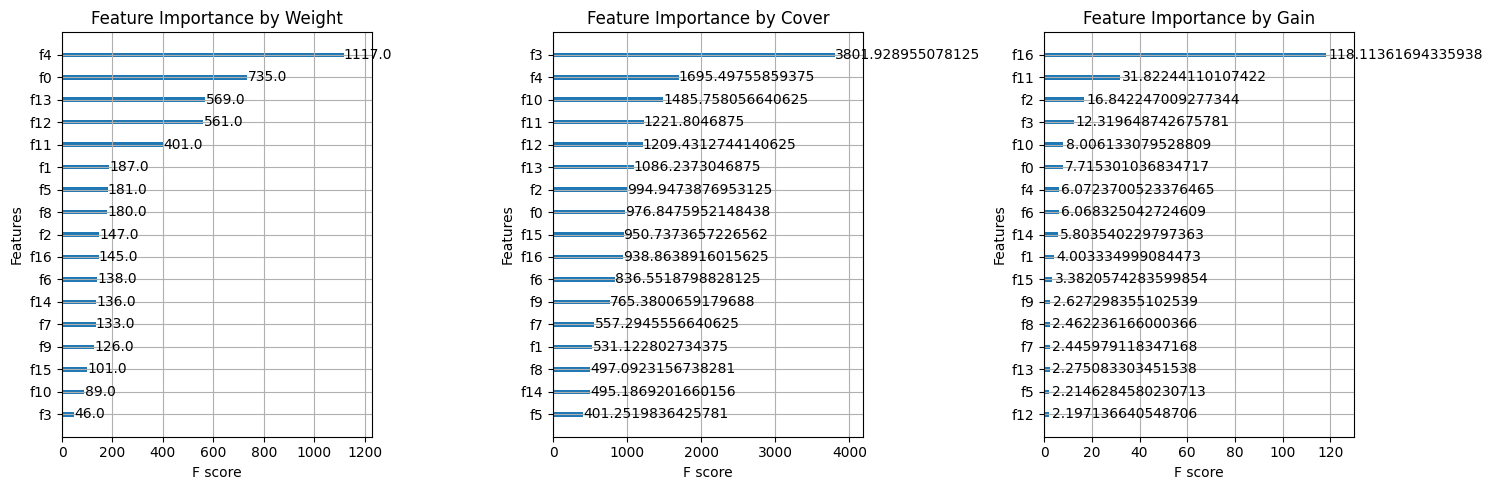

In [3]:
# Inserte su código aquí
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Se extrae el modelo en una variable para luego calcular las importancias de las features
model = pipeline.named_steps['classifier']

# Se crea la figura sobre la que se colocarán los gráficos de las importancias de las features
plt.figure(figsize=(15, 5))

# Se grafica el primer subplot con las importancias de las features por 'weight'
plt.subplot(1, 3, 1)
plot_importance(model, importance_type='weight', title='Feature Importance by Weight', ax=plt.gca())

# Se grafica el segundo subplot con las importancias de las features por 'cover'
plt.subplot(1, 3, 2)
plot_importance(model, importance_type='cover', title='Feature Importance by Cover', ax=plt.gca())

# Se grafica el tercer subplot con las importancias de las features por 'gain'
plt.subplot(1, 3, 3)
plot_importance(model, importance_type='gain', title='Feature Importance by Gain', ax=plt.gca())

plt.tight_layout()
plt.show()

2.- Se puede notar a primera vista que los resultados obtenidos difieren bastante, ya que por ejemplo la feature más importante según 'cover' es la menos importante según 'weight'. Así mismo, la feature más importante según 'gain' se encuentra entre las menos importantes según 'weight' y 'cover'. De este modo los resultados no son compatibles. Esto se puede deber a cómo funcionan estos métodos, ya que 'weight' se determina por la cantidad de veces que aparece una feature en un árbol en todo el conjunto de árboles, mientras que 'cover' se determina por la cobertura promedio de las divisiones que utilizan la función, es decir que identifica las features que afectan a una mayor cantidad de instancias. Por último 'gain' se determina como la ganancia promedio de las divisiones que utilizan la función, es decir que determina las features que tienen un mayor poder predictivo. De este modo es normal que las 3 métricas entreguen diferentes resultados, ya que todas estas son muy diferentes y tienen distintas interpretaciones. 

3.- Se puede lograr tener una idea de cuales son las features más importantes para el modelo con las métricas dadas, más no necesariamente explican el cómo estas features interactúan entre sí. De este modo se puede decir que estas métricas son de ayuda para poder obtener la interpretabilidad de un modelo de árboles, pero no son suficientes para poder interpretabilidad completa del mismo. Como tal, las debilidades que presenta este método es que estas importancias de las features obtenidas son solamente útiles para este modelo en particular, por lo que cualquier cambio en hiperparámetros llevaría a unas feature importances diferentes. Además otro problema que tiene es que estos métodos solo ven la importancia individual de las features, pero no las relaciones que hay entre estas. 

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features.
2. Visualice los resultados de este método en un gráfico.
3. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?).
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta?
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado.

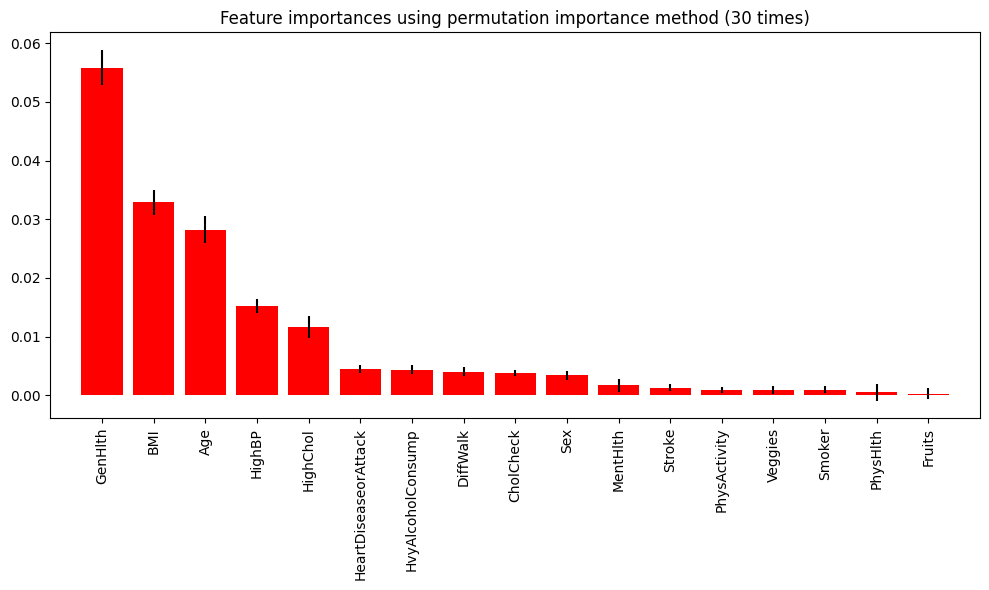

In [11]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance

# Se crean las listas es las que se guardarán las importancias y las desviaciones estándar
importances = []
stds = []

# Se realiza el método de permutación 30 veces 
for _ in range(30):
    result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    importances.append(result.importances_mean)
    stds.append(result.importances_std)

# Se convierten la lista de importancias y la de desviaciones estándar en un array de numpy y se calcula su media para poder realizar el gráfico
importances = np.array(importances)
stds = np.array(stds)
mean_importances = importances.mean(axis=0)
std_importances = stds.mean(axis=0)

# Se crea una variable con los nombres de las features y una con los índices de las importancias para poder graficar
feature_names = numerical_features
indices = np.argsort(mean_importances)[::-1]

# Se crea el gráfico con la media de las importancias mostrando la desviación estándar de estas
plt.figure(figsize=(10, 6))
plt.title("Feature importances using permutation importance method (30 times)")
plt.bar(range(X.shape[1]), mean_importances[indices], color="r", yerr=std_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [10]:
# Se muestran las desviaciones estándar de la importancia de las features
print(std_importances)

[0.00223098 0.00076972 0.00190704 0.00055708 0.00209604 0.00058133
 0.00071514 0.00054876 0.00094903 0.00070995 0.00082286 0.00300513
 0.00111783 0.00144365 0.00075013 0.00061091 0.00118432]


3.- Se puede notar que la desviación estándar en general es pequeña para todas las features, aunque en el caso de la sexta a la décima feature si puede ser significativa, ya que los los valores de importancia de estas features son muy similares entre si. 

4.1.- El método de permutación mide la importancia de las features observando las variaciones en el rendimiento del modelo cuando se permitan los valores de esta. De este modo si al variar una feature cambia mucho el rendimiento del modelo implicará que esta feature es importante. 

4.2.- Las features con más importancia son 'GenHlth', 'BMI', 'Age', 'HighBP' y 'HighChol'. Esto tiene sentido, ya que si la persona tiene una mala salud general se podría considerar más probable la diabetes, así como lo es que una persona tenga un mayor índice de masa corporal, una mayor edad, una alta presión sanguínea o colesterol alto. De este modo hace sentido que estas sean las features más relevantes ya que afectan directamente a la salud de las personas. 

4.3.- En este punto se podría decir que este método es mejor a la hora de poder determinar las importancias de las features, ya que este se basa en evaluar el impacto directo en el rendimiento del modelo que tienen cada una de las features, por lo que finalmente se puede considerar este como el mejor método para determinar las importancias de las features. 

4.4.- Como ventajas de este método están la robustez que tiene, ya que se realizaron los cálculos de las importancias de características 30 veces, además de que este modelo entrega un mejor acercamiento a las features más influyentes, debido a que considera el impacto directo de cada una de estas en el rendimiento del modelo. Por último la otra ventaja que tiene es que es un método agnostico, por lo que se puede aplicar a otros modelos de machine learning que no estén basados necesariamente en árboles. 

Como desventajas de este método se puede considerar que el tiempo de ejecución para poder obtener las importancias de las features es mucho mayor al que tardaban los otros métodos, tardando 44 segundos en ejecutarse, mientras que los 3 métodos anteriores tardaron en total 1.4 segundos. Otra desventaja es que es posible que haya variabilidad en las importancias de las features si es que se aplica otra partición de los datos para el set de entrenamiento, por lo que sería un método inestable. Por último también se puede notar el método de permutación utiliza el conjunto de prueba por lo que si este cambia los resultados pueden variar igualmente. 

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo.
2. ¿Qué representa cada número en su resultado?
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [12]:
!pip install shap

   ---------------------------------------- 0.0/455.5 kB ? eta -:--:--
   --------------------------------------- 455.5/455.5 kB 14.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 83.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ------ --------------------------------- 4.4/28.1 MB 141.0 MB/s eta 0:00:01
   ------------ --------------------------- 8.8/28.1 MB 139.1 MB/s eta 0:00:01
   ----------------- ---------------------- 12.5/28.1 MB 131.2 MB/s eta 0:00:01
   ------------------------ --------------- 17.4/28.1 MB 108.8 MB/s eta 0:00:01
   --------------------------- ------------ 19.6/28.1 MB 108.8 MB/s eta 0:00:01
   ------------------------------- -------- 22.4/28.1 MB 93.9 MB/s eta 0:00:01
   -------------------------------------- - 27.4/28.1 MB 93.9 MB/s eta 0:00:01
   ---------------------------------------  28.1/28.1 MB 93.9 MB/s eta 0:00:0

In [13]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [14]:
# Inserte código para calcular shapley values aquí
import shap

# Se extrae el modelo utilizado para calcular los SHAP values
model = pipeline.named_steps['classifier']

# Se calculan los SHAP values del modelo
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(col_transformer.transform(X_test))

# Se grafican los SHAP values para el primer paciente
patient_index = 0  
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[patient_index], col_transformer.transform(X_test)[patient_index], feature_names=numerical_features)

c:\Users\benja\OneDrive\Escritorio\MDS7202\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 5.2 Aporte local (0.4 puntos)


1. Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

  - ¿Existe algún patrón común entre las instancias analizadas?

  - ¿Es posible generalizar estas conclusiones a todo el dataset?

In [17]:
# Inserte código para generar gráficos de aporte local aquí
# Se grafican los SHAP values para el paciente 1
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], col_transformer.transform(X_test)[1], feature_names=numerical_features)

In [18]:
# Se grafican los SHAP values para el paciente 9
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[9], col_transformer.transform(X_test)[9], feature_names=numerical_features)

In [19]:
# Se grafican los SHAP values para el paciente 150
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[150], col_transformer.transform(X_test)[150], feature_names=numerical_features)

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

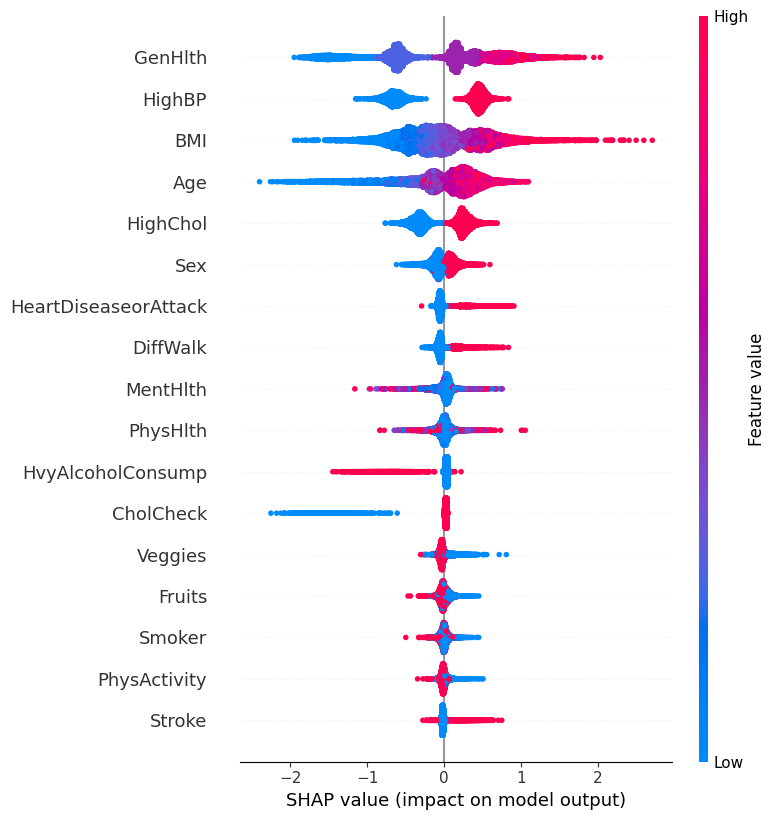

In [20]:
# Inserte código para generar gráficos de aporte global aquí

# Se utiliza summary_plot para graficar el aporte de cada feature a nivel global
shap.summary_plot(shap_values, col_transformer.transform(X_test), feature_names=numerical_features)

### 5.4 Scatter plot (0.4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
# Inserte código para generar gráficos PDP aquí

## 6. Sistema de Reglas! (1.0 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from alibi.explainers import AnchorTabular

2023-06-16 03:21:35.062920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 03:21:35.266905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-16 03:21:35.266966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-16 03:21:35.308521: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-16 03:21:38.061257: W tensorflow/stream_executor/platform/de

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>